# Fisher の線形判別分析

\begin{align*}
    \mathbf{W} =& \sum_{k \in \mathcal{G}} \sum_{i:g_i=k} (\mathbf{x}_i - \boldsymbol{\mu}_k) (\mathbf{x}_i-\boldsymbol{\mu}_k)^T \\
    \mathbf{B} =& \mathbf{M}^T \mathbf{M} \notag \\
    =& \left[ \begin{matrix}
            \boldsymbol{\mu}_1 &
            \boldsymbol{\mu}_2 & 
            \cdots &
            \boldsymbol{\mu}_K
        \end{matrix} \right]
        \left[ \begin{matrix}
            \boldsymbol{\mu}_1 ^T \\
            \boldsymbol{\mu}_2^T \\
            \vdots \\
            \boldsymbol{\mu}_K^T
        \end{matrix} \right]
\end{align*}
と定義して、
\begin{align*}
    \max_{\mathbf{a}} \mathbf{a}^T \mathbf{B} \mathbf{a} \quad
    {\rm subject\ to\ }
    \mathbf{a}^T \mathbf{W} \mathbf{a} = 1
\end{align*}
を解く。
Lagrange の未定乗数法を用いる。
\begin{align*}
    L(\mathbf{a}, \lambda)
    = \mathbf{a}^T \mathbf{B} \mathbf{a} - \lambda (\mathbf{a}^T \mathbf{B} \mathbf{a} - 1)
\end{align*}
とおいて微分する。
\begin{align*}
    \cfrac{\partial L}{\partial \mathbf{a}}
    =& 2 \mathbf{B} \mathbf{a} - 2 \lambda \mathbf{W} \mathbf{a} = 0 \\
    \therefore\quad
    \mathbf{B} \mathbf{a} =& \lambda \mathbf{W} \mathbf{a}
\end{align*}


もし$\mathbf{W}$ が正則であれば
\begin{align*}
    \mathbf{W}^{-1} \mathbf{B} \mathbf{a} = \lambda \mathbf{a}
\end{align*}
という固有値問題になる。

固有値の大きい順に固有ベクトルを$L$個とって次元を削減する。

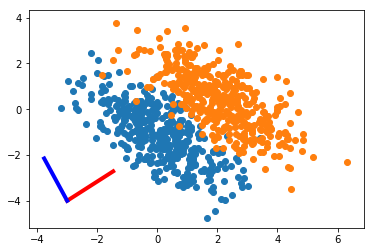

In [70]:
# 2次元データの固有値方向

import numpy as np;
import matplotlib.pyplot as plt;

N = 400;
K = 2;
dim = 2;
L = 1;

# データ生成
m = np.array ([[0,2], [-1,0.5]]);
P = np.array ([[1, 1],[-1, 1]]) / np.array (2);
S_sqrt = np.array ([[2.25, 0], [0, 1]]);
X = np.zeros ((dim, N, K));
for k in range (K):
    tmp = P.dot (S_sqrt).dot (np.random.randn (dim,N)) + m[:,k].reshape (dim,1);
    X[:,:,k] = tmp;
    plt.scatter (X[0,:,k], X[1,:,k]);

    

# 固有値計算
mu = np.zeros ((K, dim));
S_w = np.zeros ((K, dim, dim));
for k in range (K):
    mu[k,:] = np.mean (X[:,:,k], axis=1).T;

for k in range (K):
    for i in range (N):
        xi = (X[:,i,k]-mu[k,:]).reshape (dim,1); 
        S_w[k,:,:] += xi.dot (xi.T);

W = np.sum (S_w, axis=0);
B = mu.T.dot (mu);

[l, a] = np.linalg.eig (np.linalg.inv (W).dot (B));
# print (l);
# print (a);
scale = 2.0;
o = np.array ([[-3],[-4]],dtype=float);
plt.plot ([o[0,0],scale*a[0,0]+o[0,0]],[o[1,0],scale*a[1,0]+o[1,0]], color='red', lw=4)       # 第１固有値方向
plt.plot ([o[0,0],scale*a[0,1]+o[0,0]],[o[1,0],scale*a[1,1]+o[1,0]], color='blue', lw=4)　    # 第２固有値方向

In [73]:
# 実データへの応用

# 作りかけ 2019/06/02

import csv

#########################
def normalization_data (X,dim):
    m = np.mean (X,axis=0);
    s = np.std (X,axis=0);
    return (X-m.reshape (1,dim)) / s.reshape(1,dim);

#########################


# データ取得

# 教師データ
train_file = open("./data/vowel_training.csv", "r", encoding="utf_8", errors="", newline="" )
train_f = csv.reader(train_file, delimiter=",", doublequote=True, lineterminator="\r\n", quotechar='"', skipinitialspace=True)
header = next(train_f);
train_data = np.array ([[float (x) for x in row[1:]] for row in train_f]);
train_Y = np.array ([int(x-1) for x in train_data[:,0]]);
train_X_raw = train_data[:,1:];

K = len(np.unique(train_Y));
N, dim = train_X_raw.shape;

# データを正規化
train_X = normalization_data (train_X_raw, dim)

# 固有値計算
mu = np.zeros ((K, dim));
S_w = np.zeros ((K, dim, dim));
for k in range (K):
    mu[k,:] = np.mean (train_X[:,:,k], axis=1).T;

for k in range (K):
    for i in range (N):
        xi = (train_X[i,:]-mu[k,:]).reshape (dim,1); 
        S_w[k,:,:] += xi.dot (xi.T);

W = np.sum (S_w, axis=0);
B = mu.T.dot (mu);

[l, a] = np.linalg.eig (np.linalg.inv (W).dot (B));
print (l);
#print (a);
#scale = 2.0;

IndexError: too many indices for array